**<center><font color="black" size="+5">IPL Data Analysis</font></center>**


# **<span style="color:#1E90FF">IPL Data Analysis using Spark</span>**

## <span style="color:#228B22">Efficient Analysis and Processing of IPL Data</span>

In this project, we perform a comprehensive analysis of Indian Premier League (IPL) data using PySpark, a powerful tool for large-scale data processing. PySpark combines Python's easy-to-use syntax with the scalability and speed of Apache Spark, enabling efficient handling and analysis of massive datasets.

### Key Objectives:
- **Data Cleaning**: Load and preprocess IPL datasets to handle missing values, correct data types, and remove inconsistencies.
- **Exploratory Data Analysis (EDA)**: Generate summary statistics and visualize key metrics to understand trends and patterns.
- **Performance Analysis**: Analyze player performances, team statistics, and match outcomes to derive insights.
- **Modeling and Insights**: Build predictive models to forecast future match results and player performances.

### Benefits of Using PySpark:
- **Scalability**: Easily scale your data processing from a single machine to a cluster of machines.
- **Speed**: Take advantage of in-memory computing and parallel processing to handle large datasets efficiently.
- **Integration**: Seamlessly integrate with other big data tools and databases.

By leveraging PySpark for IPL data analysis, we ensure that the processing is both efficient and scalable, making it possible to extract valuable insights from extensive datasets with ease.


## **<span style="color:#228B22">Tech Stack</span>**

- **<span style="color:#228B22">Amazon S3 Bucket</span>**
  - A highly scalable and durable object storage service used to store and retrieve IPL datasets efficiently. It serves as the primary data storage solution for raw and processed data.

- **<span style="color:#228B22">Databricks</span>**
  - An integrated data analytics platform that simplifies big data processing and machine learning. Databricks provides a collaborative environment for data scientists and engineers to work with PySpark and Spark SQL.

- **<span style="color:#228B22">PySpark</span>**
  - The Python API for Apache Spark, enabling scalable and fast data processing. PySpark is used for data cleaning, transformation, and analysis of large IPL datasets.

- **<span style="color:#228B22">Spark SQL</span>**
  - A module of Apache Spark used for structured data processing. Spark SQL allows us to run SQL queries on data stored in S3 and process it efficiently within the Databricks environment.

- **<span style="color:#228B22">Pandas</span>**
  - A powerful Python library for data manipulation and analysis. Pandas is used for handling smaller, in-memory datasets, performing complex data operations, and converting Spark DataFrames to Pandas DataFrames for detailed analysis.

- **<span style="color:#228B22">Matplotlib</span>**
  - A comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib is used to generate plots and graphs to visualize the results of the IPL data analysis.


# **<span style="color:#1E90FF">Commencement of IPL Data Analysis Project</span>**


In [2]:
#importing Required Libraries for the Analysis

from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import col, when, sum, avg, row_number
from pyspark.sql.window import Window
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pyspark.sql import SparkSession 

#create session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [ ]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [ ]:
# Define the schema for the ball-by-ball dataset

ball_by_ball_schema = StructType([
     # Define StructFields for each column in the dataset
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [ ]:
 #Read the ball-by-ball dataset from Amazon S3 using Spark DataFrame API

ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://ipl-data-storage-s3/Ball_By_Ball.csv")


In [ ]:
# Define the schema for the match dataset


match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Match.csv")


In [ ]:
# Define the schema for the player dataset

player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://ipl-data-storage-s3/Player.csv")


In [ ]:
# Define the schema for the player_match dataset

player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://ipl-data-storage-s3/Player_match.csv")


In [ ]:
# Define the schema for the team dataset

team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://ipl-data-storage-s3/Team.csv")

In [ ]:
ball_by_ball_df = ball_by_ball_df.filter((col("wides") == 0  ) & (col("noballs") == 0) )

In [ ]:
# Calculate the total and average runs scored per match and innings

total_and_avg_runs_scored = ball_by_ball_df.groupBy("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("avg_runs")
)

total_and_avg_runs_scored.show()

+--------+----------+----------+------------------+
|match_id|innings_no|total_runs|          avg_runs|
+--------+----------+----------+------------------+
|  980940|         1|       138|              1.15|
|  419132|         1|       162|              1.35|
| 1082632|         2|       202|1.9238095238095239|
|  335993|         2|       131|1.6794871794871795|
| 1082617|         1|       123|1.0512820512820513|
|  980910|         2|       156| 1.471698113207547|
|  598057|         2|       141| 1.236842105263158|
|  980966|         1|       143|1.1916666666666667|
|  980982|         2|       169|1.4083333333333334|
|  419114|         2|       130|1.1206896551724137|
|  734042|         2|       146| 1.697674418604651|
|  829772|         2|       111|1.3373493975903614|
|  980934|         1|       130|1.0833333333333333|
|  733976|         1|       142| 1.392156862745098|
|  734018|         1|       132|               1.1|
|  501257|         2|       143|1.4019607843137254|
|  548328|  

In [ ]:
# Define a Window specification partitioned by match ID and innings number, ordered by over ID

windowSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)


In [ ]:
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True), True).otherwise(False)
)

In [ ]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [ ]:
from pyspark.sql.functions import year, month , dayofmonth, when

# Extract year, month, and day from the match date and create new columns
match_df = match_df.withColumn("Year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

# Create a new column "Win_margin_category" based on the win margin
match_df = match_df.withColumn(
    "Win_margin_category",
    when(col("win_margin") >= 100 , "High").
    when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium").
    otherwise("Low")
)

# Create a new column "toss_and_match_winner" to indicate whether the toss winner is also the match winner
match_df = match_df.withColumn(
    "toss_and_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

match_df.show(10)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+---------------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|    manofmach|win_margin|country_id|Year|month| day|Win_margin_category|toss_and_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+---------------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| 

In [ ]:
from pyspark.sql.functions import lower , regexp_replace

# Convert player names to lowercase and remove special characters
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9]", "")))

# Fill missing values in batting_hand and bowling_skill columns with "unknown"
player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"})

# Derive batting style based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("Right"), "Right-handed").otherwise("Left-handed")
)


player_df.show(10)

+---------+---------+--------------+----+--------------+--------------------+------------+-------------+
|player_sk|player_id|   player_name| dob|  batting_hand|       bowling_skill|country_name|batting_style|
+---------+---------+--------------+----+--------------+--------------------+------------+-------------+
|        0|        1|     scganguly|null| Left-hand bat|    Right-arm medium|       India|  Left-handed|
|        1|        2|    bbmccullum|null|Right-hand bat|    Right-arm medium| New Zealand| Right-handed|
|        2|        3|     rtponting|null|Right-hand bat|    Right-arm medium|   Australia| Right-handed|
|        3|        4|      djhussey|null|Right-hand bat|  Right-arm offbreak|   Australia| Right-handed|
|        4|        5|mohammadhafeez|null|Right-hand bat|  Right-arm offbreak|    Pakistan| Right-handed|
|        5|        6|       rdravid|null|Right-hand bat|  Right-arm offbreak|       India| Right-handed|
|        6|        7|       wjaffer|null|Right-hand bat

In [ ]:

from pyspark.sql.functions import col, when , expr, current_date

# Determine veteran status based on player's age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35 , "Veteran").otherwise("Non-Veteran")
)

# Calculate the number of years since player's debut
player_match_df = player_match_df.withColumn(
    "year_since_debut",
    (year(current_date()) - col("season_year"))
)


player_match_df.show(5)

+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+----------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|year_since_debut|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+-------

In [ ]:
# Create temporary views for Spark SQL queries

ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [ ]:
# Perform SQL query to find the top-scoring batsmen in each season

top_scoring_batsmen = spark.sql("""
select 
    p.player_name,
    m.season_year,
    sum(b.runs_scored) as total_runs
from 
    ball_by_ball b
join 
    match m on b.match_id = m.match_id
join 
    player_match pm on b.match_id = pm.match_id and b.striker = pm.player_id
join 
    player p on p.player_id = pm.player_id
group by 
    p.player_name, m.season_year
order by 
    m.season_year, total_runs desc
""")

top_scoring_batsmen.show(10)

+------------+-----------+----------+
| player_name|season_year|total_runs|
+------------+-----------+----------+
|     semarsh|       2008|       614|
|    ggambhir|       2008|       532|
|stjayasuriya|       2008|       508|
|    srwatson|       2008|       463|
|     gcsmith|       2008|       437|
| acgilchrist|       2008|       431|
|    ykpathan|       2008|       430|
|     skraina|       2008|       420|
|     msdhoni|       2008|       414|
|     vsehwag|       2008|       399|
+------------+-----------+----------+
only showing top 10 rows



In [ ]:
# Perform SQL query to find the economical bowlers

economical_bowler = spark.sql("""
SELECT 
    p.player_name,
    AVG(b.runs_scored) AS avg_runs_per_ball,
    COUNT(b.bowler_wicket) AS total_wickets
FROM 
    ball_by_ball b
JOIN 
    player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN 
    player p ON pm.player_id = p.player_id
WHERE 
    b.over_id <= 6
GROUP BY 
    p.player_name
HAVING 
    COUNT(*) > 120
ORDER BY 
    avg_runs_per_ball, total_wickets
""")

economical_bowler.show()

+--------------+------------------+-------------+
|   player_name| avg_runs_per_ball|total_wickets|
+--------------+------------------+-------------+
|smsmsenanayake|0.8492063492063492|            0|
|      spnarine| 0.929718875502008|            0|
|     gdmcgrath|0.9324324324324325|            0|
|     slmalinga|0.9407630522088354|            0|
|  sohailtanvir| 0.946969696969697|            0|
|     achandila|0.9513888888888888|            0|
|      dpnannes|0.9532163742690059|            0|
|        bkumar|0.9561487130600572|            0|
|  bwhilfenhaus|            0.9625|            0|
|      rrampaul|0.9629629629629629|            0|
|       dwsteyn|0.9700374531835206|            0|
|       rashwin|0.9729344729344729|            0|
|     smpollock|1.0049019607843137|            0|
|   ankitsharma|1.0072463768115942|            0|
|      rjharris|1.0093896713615023|            0|
|     wpujcvaas|1.0151515151515151|            0|
|      acthomas|1.0277777777777777|            0|


In [ ]:
# Perform SQL query to analyze the impact of toss on individual matches

toss_impact_individual_matches = spark.sql("""
select
m.match_id,m.toss_winner,m.toss_name choose_to,m.match_winner,
case when m.toss_winner = m.match_winner then "won" else "lost" end as match_outcome
from match m
where m.toss_name is not null
order by m.match_id
""")

toss_impact_individual_matches.show(5)

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|choose_to|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         lost|
+--------+--------------------+---------+--------------------+-------------+
only showing top 5 rows



In [ ]:
# Perform SQL query to calculate the average runs scored by players in match wins

avg_runs_in_wins = spark.sql("""
    select p.player_name, avg(b.runs_scored) as avg_runs_in_wins,count(*) as innings_played
    from ball_by_ball b
    join player_match pm on b.match_id = pm.match_id and b.striker = pm.player_id
    join player p on pm.player_id = p.player_id
    join match m on pm.match_id = m.match_id
    where m.match_winner = pm.player_team
    group by p.player_name
    order by avg_runs_in_wins desc
    """)

avg_runs_in_wins.show(5)

+------------+------------------+--------------+
| player_name|  avg_runs_in_wins|innings_played|
+------------+------------------+--------------+
|  rashidkhan|               6.0|             1|
|shahidafridi|3.3333333333333335|             6|
|     babhatt|               3.0|             2|
|     anahmed|               3.0|             3|
|      snkhan|2.5789473684210527|            19|
+------------+------------------+--------------+
only showing top 5 rows



In [ ]:
# Execute SQL Query
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_ball
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC
""")


In [ ]:
# Execute SQL Query
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")

In [ ]:
# Execute SQL Query
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")


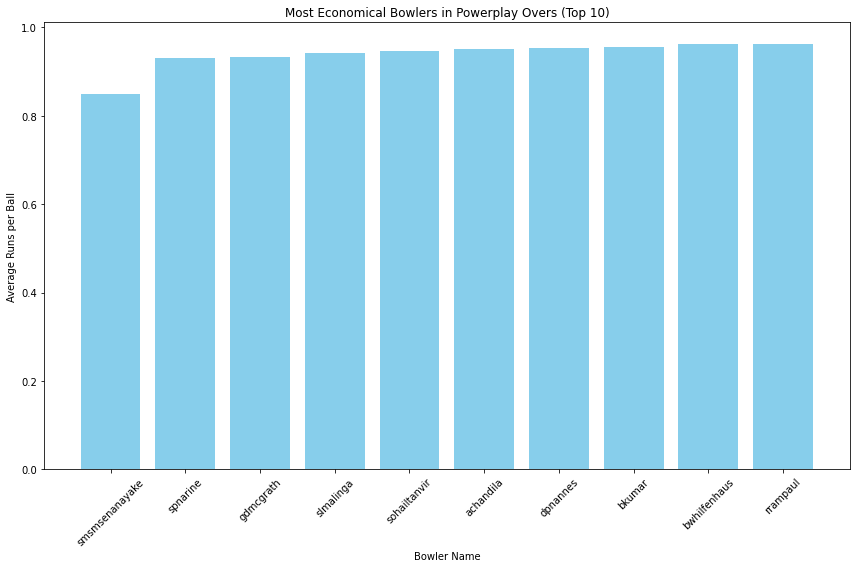

In [ ]:
# Assuming 'economical_bowler' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowler.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

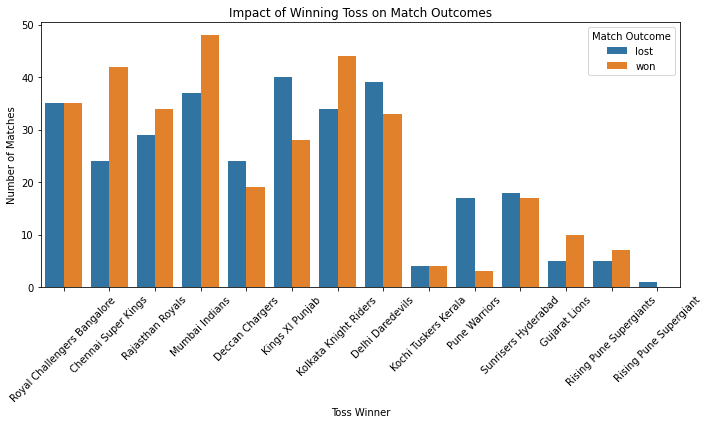

In [ ]:
toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

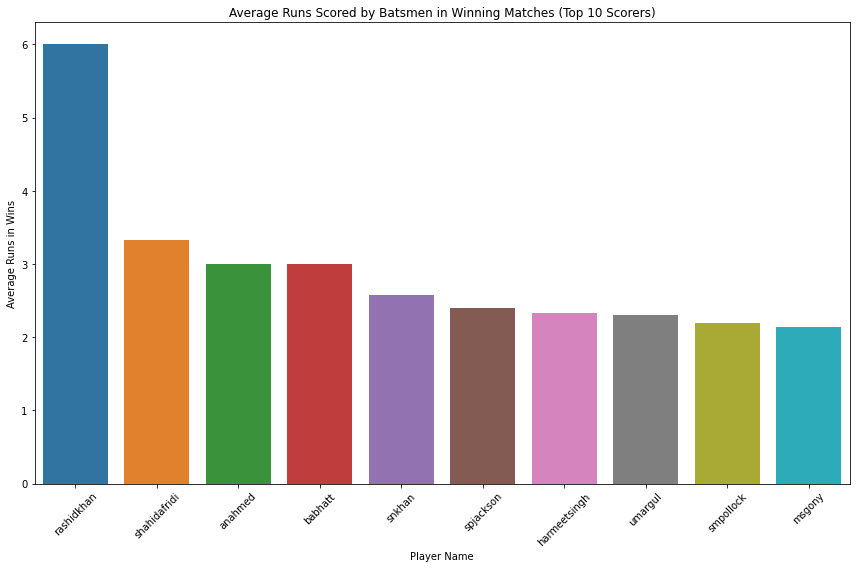

In [ ]:
average_runs_pd = avg_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


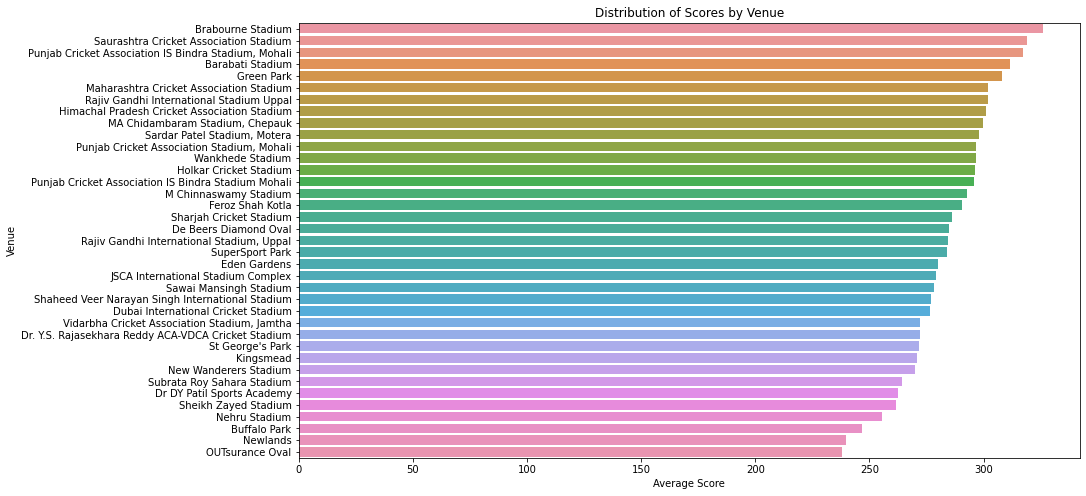

In [ ]:
# Convert to Pandas DataFrame
scores_by_venue_pd = scores_by_venue.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

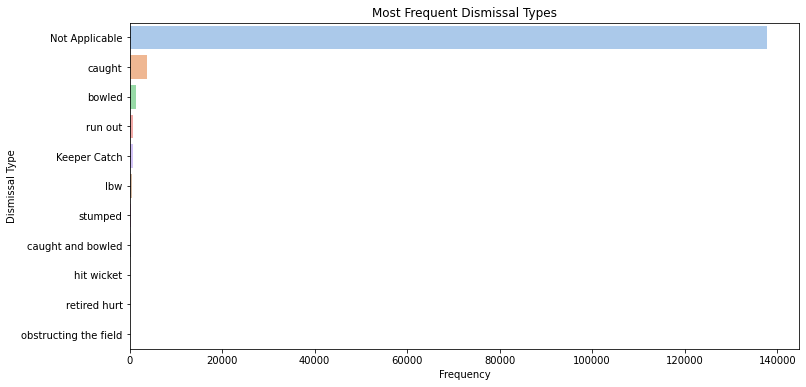

In [ ]:
# Convert to Pandas DataFrame
dismissal_types_pd = dismissal_types.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

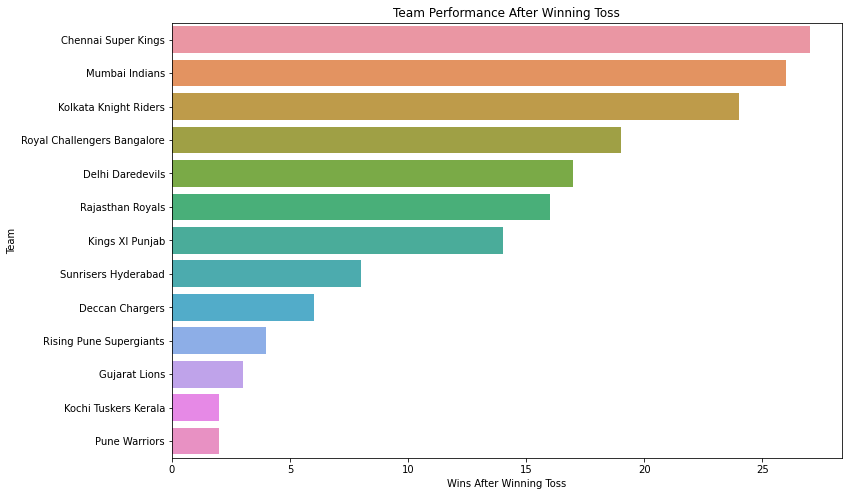

In [ ]:
# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()
